# Vibrations Lab Notebook

## Importing modules

In [8]:
# For file finding:
import os
import glob

# The usual:
import numpy as np
import pandas as pd
import math
import random as rand

# Plotting:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pylab import rcParams
import seaborn as sb

# ML:
from sklearn.linear_model import LinearRegression

%matplotlib inline
rcParams['figure.figsize'] = 10, 10
sb.set_style('whitegrid')

## Importing Data

In [272]:
# This goes and finds files in the specified path of a certain extension.
# It then makes pandas dataframes out of them

# Can use suppres flag to hush output

def file_finder(path,extension,suppress=False):

    if not suppress:
        print('Looking for files in:'+path+'\n')

    os.chdir(path) # Change dir to path
    files = {}
    for file in glob.glob(extension):
        if not suppress:
            print('Found',file+'... adding')
        files["file{0}".format('_'+file)] = path+'\\'+file
        
    if len(files) == 0:
        print('No files found :(')
        return # Exit function if no files found
    
    
    print ('\n')
    
    # Creates data frames from filenames:
    dataframes = {}
    for i,file in enumerate(files):
        try:
            dataframes["df_{}".format(i)] = pd.read_csv(files[file])
        except:
            print('There was an error reading',file,'. Please check and try again')
            return
        if not suppress:
            print( 'Writing ' + file + ' to ' + "df_{}".format(i))
            
    return dataframes

dataframes = file_finder(r'..\data',"*.csv")

Looking for files in:..\data

Found 1_350spring_50psi_compression0_rebound0_speed2.csv... adding
Found 2_nospring_50psi_compression0_rebound0_speed2.csv... adding
Found 3_nospring_50psi_compression0_rebound4T_speed2.csv... adding
Found 4_nospring_50psi_compression3p66T_rebound0_speed2.csv... adding
Found 5_nospring_50psi_compression0_rebound0_speed4.csv... adding
Found constants.csv... adding


Writing file_1_350spring_50psi_compression0_rebound0_speed2.csv to df_0
Writing file_2_nospring_50psi_compression0_rebound0_speed2.csv to df_1
Writing file_3_nospring_50psi_compression0_rebound4T_speed2.csv to df_2
Writing file_4_nospring_50psi_compression3p66T_rebound0_speed2.csv to df_3
Writing file_5_nospring_50psi_compression0_rebound0_speed4.csv to df_4
Writing file_constants.csv to df_5


In [273]:
df = dataframes['df_5']
df.head(10)

,Unnamed: 0,Force,Displacement,Velocity
0,Scale,0.4952,10.000,1.000
1,Offset,-0.4125,-1.365,0.007


Text(0, 0.5, 'Force / kN')

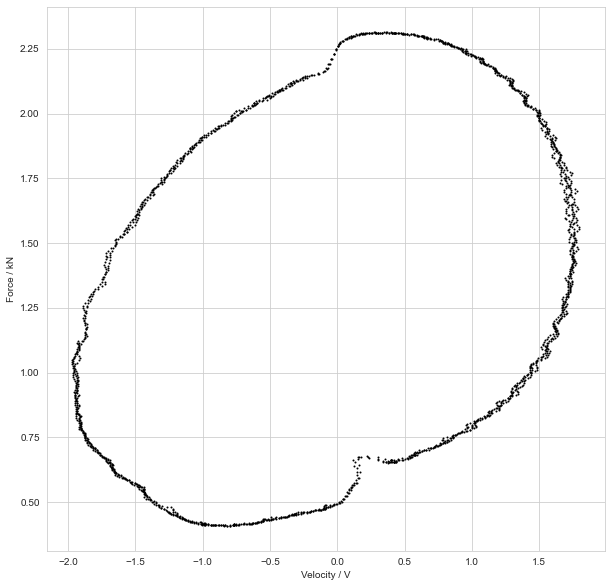

In [271]:
# Test graph
xaxis='Velocity';xunit='V'
yaxis='Force';yunit='kN'

plt.scatter(x=df[xaxis],
            y=df[yaxis],
            s=1,
            color='black'
           )

plt.xlabel(xaxis +' / '+ xunit)
plt.ylabel(yaxis +' / '+ yunit)


Now we have the data imported, it needs to be calibrated

### Calibration
- Add time column
- Differentiate the diplacement signal numerically based on time separation
    - Sample Frequency: **1000.0** Samples per second
    - Sample Seconds: **2.00**
- Plot derivative of the displacement against the voltage values
- Calculate a line of best fit for the calibrating funciton.
- Check units

In [ ]:
def calibration(df):
    

In [152]:
'''
     ---------------------------------------------------------------------
    | Function can either generate a selected graph of data with a Linear |
    | Regression line plotted on it and the equation of the line if graph |
    | is True                                                             |
    |                                                                     |
    |                                or                                   |
    |                                                                     |
    |      By default it will return an array with the following:         |
    |                                                                     |
    |        [x1 coef,x2 coef.,std err of x1, std error of x2]            |
     ---------------------------------------------------------------------

'''
def linreg(x_csv,y_csv,graph=False,title='',eqn=False):
    
    x = np.array(x_csv) # Parses in data
    y = np.array(y_csv)
    
    if graph:
        
        linreg = LinearRegression()
        x_rs = x.reshape(-1,1)        # Transposes array
        linreg.fit(x_rs,y)            # Makes linear regression line
        y_pred = linreg.predict(x_rs) # Generates predicted y values for each x value

        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(x_rs,y,3)                               # Plots clock data on a scatter. 6 Series total
        ax.plot(x_rs, y_pred, color='red', linewidth=0.5)  # Plots x values against predicted y values

        scale_y = 1e-3                                                             # Set Scale
        ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_y))   
        ax.yaxis.set_major_formatter(ticks_y)                                      # Applies scale to y axis

        plt.xlabel('Load / N')                  # Naming x axes
        plt.ylabel('$\delta$ / $10^{-3}$  m')   # Naming y axes
        plt.title(title)
        
        plt.show
        
        if eqn:
            print ("Equation for regression line of",
                   title,": >>> y =",linreg.coef_[0],"x +",
                   linreg.intercept_, "<<<")
        
        return ''
    
    if not graph:
        
        # Polyfit gives linear regression coefs.
        # cov=True produces covarience from which std.error can be generated
        # by squarooting the diagonals of the matrix.

        coef, covar = np.polyfit(x,y,1,cov=True)

        std_err_m = math.sqrt(covar[0,0])
        std_err_intcpt = math.sqrt(covar[1,1])
        
        return [coef[0],coef[1],std_err_m,std_err_intcpt]

        # print ("Std Error of",title,">>> gradient  >>>",std_err_m,"<<<")
        # print ("Std Error of",title,">>> intercept >>>",std_err_intcpt,"<<<")